<a href="https://colab.research.google.com/github/keng-oh/colab/blob/master/multiple_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 不要な警告を非表示にする
import warnings
warnings.filterwarnings('ignore')

# データセットの読み込み
# bostonデータを格納したクラス
from sklearn.datasets import load_boston

# インスタンスを生成
boston = load_boston()

# データの詳細を出力
# print(boston.DESCR)

# どんな説明変数があるのかを確認
# 項目名がbostonのfeature_namesに格納されている
#columns = boston.feature_names
#columns

# 説明変数を確認
#boston.data

# 目的変数を確認
# 住宅価格の中央値MEDV
# 数が多いので､初めの50個のみを出力
#boston.target[:50]

In [0]:
# Pandasのデータフレームに変換
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
df_data.head()

# 目的変数もDataFrameに変換
# 各区画について住宅価格の中央値が格納されているのでMEDVと命名
df_target = pd.DataFrame(boston.target, columns=['MEDV'])
#df_target.head()

# 説明変数と目的変数のDataFrameを結合する
# MEDVが右端に付け加えられた事を確認
df = pd.concat([df_data, df_target], axis=1)
df.head()

# 特徴量の数が多いので､locメソッドで一部の特徴量のみを選択
df_pickup = df.loc[:, ['LSTAT', 'INDUS', 'DIS', 'RM', 'MEDV']]

# 散布図行列を出力
# locメソッドで一部の特徴量だけをピックアップ
import seaborn as sns
#sns.pairplot(df_pickup, height=2.0)
#plt.show()

# 相関係数行列を出力
# 数値の羅列になるので見づらい
#df.corr()

# ヒートマップの表示
#plt.figure(figsize=(12, 9))
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
#sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f')
#plt.show()

# 基本統計量を出力
#df.describe()

In [0]:
# 説明変数のデータを用意
# DataFrameの.valuesメソッドでarrayに変換できます
X = df.loc[:, ['LSTAT', 'RM']].values
X
# 教師データを用意
# DataFrameの.valuesメソッドでarrayに変換できます
y = df.loc[:, ['MEDV']].values
# どのように入っているか、最初の１０個を表示して確認
y[:10]

# ホールド・アウト法によるデータの分割
# (X, y, テストにどの割合を割くか, 分割のしかたを決める乱数生成器)
# テストデータの割合は、test_size引数に指定することで変更可能です（今回は、train:test = 7:3）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# データ全体のサンプル数を確認
print(X.shape)
print(y.shape)

# trainデータのサンプル数を確認
print(X_train.shape)
print(y_train.shape)

# testデータのサンプル数を確認
print(X_test.shape)
print(y_test.shape)

(506, 2)
(506, 1)
(354, 2)
(354, 1)
(152, 2)
(152, 1)


In [0]:
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 重回帰線形モデルの学習
# trainデータのみを用いていることに注意
lr.fit(X_train, y_train)

# 定数項を出力
lr.intercept_

# 偏回帰係数を出力
# [LSTATの係数, RMの係数]
lr.coef_

# 新しい物件についてLSTATとRMを入力
# ([[LSTAT, RM]])
X_new = np.array([[12, 3]])

# 販売価格を入力
y_prop = 15

# 適正価格を予測
y_pred = lr.predict(X_new)

# 割高度を計算
price_ratio = y_prop / y_pred

# 出力
print('y_prop      : %.2f' % y_prop)
print('y_pred      : %.2f' % y_pred)
print('price_ratio : %.2f' % price_ratio)

# 決定係数をtrainとtestに分けて出力
# 過学習しているかどうかを確認
print('R^2')
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
# 自由度調整済み決定係数を出力
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))

y_prop      : 15.00
y_pred      : 5.58
price_ratio : 2.69
R^2
train: 0.651
test : 0.607
adjusted R^2
train: 0.648955
test : 0.601704


In [0]:
# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse

# RMSEをtrainとtestに分けて出力
# 過学習をしているかどうかを確認
print('RMSE')
print('train: %.3f' % (mse(y_train, lr.predict(X_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, lr.predict(X_test)) ** (1/2)))

# 基本統計量をもう一度確認
df.describe()

RMSE
train: 5.439
test : 5.721


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


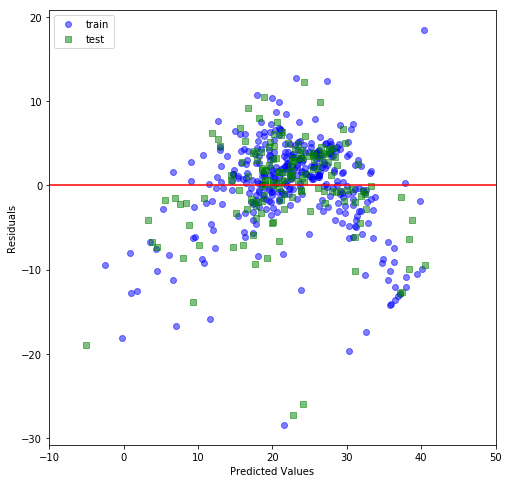

In [0]:
# 残差プロットを行う関数を定義
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-10, xmax=50, color='red') # 残差0の線を表示
    plt.xlim([-10, 50])                             # 表示する横軸の範囲を指定
    plt.show()
    
# 残差プロットを出力
res_plot(y_train, lr.predict(X_train), y_test, lr.predict(X_test))

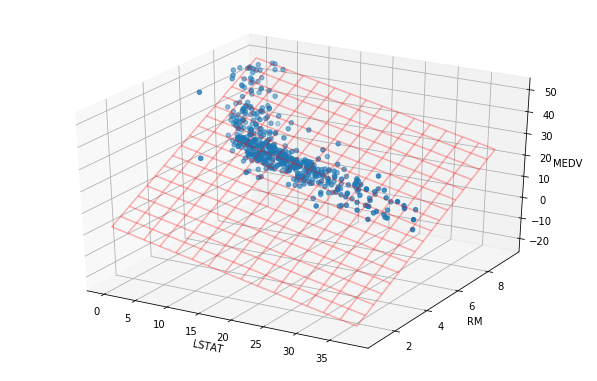

In [0]:
# 3次元のプロットをするためのライブラリを読み込み
from mpl_toolkits.mplot3d import Axes3D

# Axes3Dのインスタンスを生成
ax = Axes3D(plt.figure(figsize=(8, 5)))

# 3次元の散布図を出力
# (x軸, y軸 , z軸)
ax.scatter3D(df['LSTAT'], df['RM'], df['MEDV'])

# # 回帰平面の方程式を定義
X_grid, Y_grid = np.meshgrid(np.arange(0, 40, 2.5), np.arange(1, 10, 0.5))
w0 = lr.intercept_
w1 = lr.coef_[0, 0]
w2 = lr.coef_[0, 1]
Z = w0 + w1*X_grid + w2*Y_grid

# 回帰平面を表示
ax.plot_wireframe(X_grid, Y_grid, Z, alpha=0.3, color='red')

# 座標軸のラベルを指定
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')

# ここまでの内容でグラフをプロット
plt.show()

In [0]:
# 変数の標準化を実行
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(boston.data) # すべての説明変数を変換
y_std = ss.fit_transform(y)
                         
# 標準化された説明変数を確認
X_std[:5]

# 標準化された目的変数を確認
y_std[:10]

# 標準化した説明変数の平均を確認
# arrayのmean()メソッドで出力できる
X_std.mean()

# 標準化した目的変数の平均を確認
# arrayのmean()メソッドで出力できる
y_std.mean()

# 標準化した説明変数の標準偏差を確認
# arrayのstd()メソッドで出力できる
X_std.std()

# 標準化した目的変数の標準偏差を確認
# arrayのmean()メソッドで出力できる
y_std.std()

# 標準化したデータで線形モデルを学習させる
lr_std = LinearRegression()
lr_std.fit(X_std, y_std)

# 標準偏回帰係数を出力
lr_std.coef_

array([[-0.10017523,  0.1176512 ,  0.01556018,  0.0742493 , -0.22421527,
         0.29066587,  0.00229872, -0.3378803 ,  0.28937562, -0.22593552,
        -0.22443985,  0.09323458, -0.40799686]])